## Tides

In [1]:
import arrow
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

In [2]:
single = nc.Dataset(f'../../tides/north/SalishSea_N36_AF_North_tide_M2_grid_V.nc')
single

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Tidal Boundary Conditions for Northern Boundary
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/tools/src/tip/johnstone_strait_tides.ipynb
    references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/open_boundaries/north/SalishSea2_North_tide_M2_grid_V.nc
    history: [2017-04-25 18:13:28] Created netCDF4 zlib=True dataset.
    comment: Tidal current and amplitude data from Thomson & Huggett 1980
    dimensions(sizes): xb(30), yb(1)
    variables(dimensions): int32 nbidta(yb, xb), int32 nbjdta(yb, xb), int32 nbrdta(yb, xb), int32 xb(xb), int32 yb(yb), float32 v1(yb, xb), float32 v2(yb, xb)
    groups: 

In [3]:
xbsize = 2*single['xb'].shape[0]
xbsize

60

In [4]:
def duplicate_copy(single, xbsize):
    double = np.zeros((xbsize))
    double[0::2] = single[:]
    double[1::2] = single[:]
    return double

In [5]:
def duplicate_index(single, xbTsize):
    double = np.zeros((xbTsize))
    double[0::2] = 2*single[:]
    double[1::2] = double[0::2] + 1
    return double

In [6]:
def duplicate_constant(single, xbTsize, tsize=0):
    if tsize == 0:
        double = np.zeros((xbTsize))
        if single[0] == single[-1]:
            if single[0] != 0:
                double[:] = single[0]
            return double
        else:
            print ("NOT A CONSTANT FIELD")
    else:
        double = np.zeros((tsize, xbTsize))
        if single[0, 0] == single[-1, -1]:
            if single[0, 0] != 0:
                double[:, :] = single[:, 0]
            return double
        else:
            print ("NOT A CONSTANT FIELD")

In [7]:
def duplicate_double_constant(single, xbTsize, tsize=0):
    if tsize == 0:
        double = np.zeros((xbTsize))
        if single[0] == single[-1]:
            if single[0] != 0:
                double[:] = single[0] * 2
            return double
        else:
            print ("NOT A CONSTANT FIELD")
    else:
        double = np.zeros((tsize, xbTsize))
        if single[0, 0] == single[-1, -1]:
            if single[0, 0] != 0:
                double[:, :] = single[:, 0] * 2
            return double
        else:
            print ("NOT A CONSTANT FIELD")

In [8]:
v1 = np.expand_dims(duplicate_copy(single['v1'][0, :], xbsize), axis=0)
v1.shape

(1, 60)

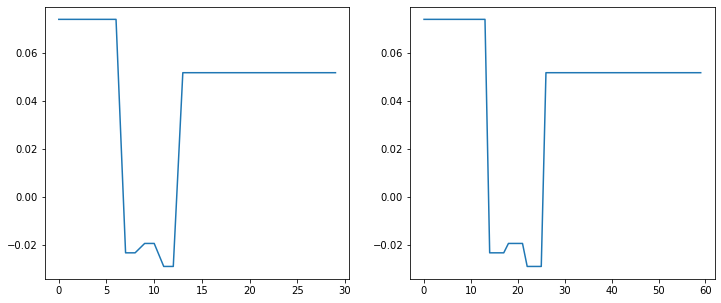

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(single['v1'][0, :])
axs[1].plot(v1[0, :]);

In [10]:
single['nbjdta']

<class 'netCDF4._netCDF4.Variable'>
int32 nbjdta(yb, xb)
    long_name: j grid position
    units: 1
unlimited dimensions: 
current shape = (1, 30)
filling on, default _FillValue of -2147483647 used

In [11]:
nbjdta = np.expand_dims(duplicate_double_constant(single['nbjdta'][0, :], xbsize), axis=0)
nbjdta

array([[1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794.,
        1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794.,
        1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794.,
        1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794.,
        1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794.,
        1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794., 1794.,
        1794., 1794., 1794., 1794., 1794., 1794.]])

In [12]:
single['nbidta']

<class 'netCDF4._netCDF4.Variable'>
int32 nbidta(yb, xb)
    long_name: i grid position
    units: 1
unlimited dimensions: 
current shape = (1, 30)
filling on, default _FillValue of -2147483647 used

In [13]:
nbidta = np.expand_dims(duplicate_index(single['nbidta'][0, :], xbsize), axis=0)
nbidta.shape

(1, 60)

In [14]:
nbidta

array([[ 64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
         75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,
         86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118.,
        119., 120., 121., 122., 123.]])

In [15]:
single['nbrdta'][:]

masked_array(data=[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [16]:
nbrdta = np.expand_dims(duplicate_constant(single['nbrdta'][0, :], xbsize), axis=0)
nbrdta.shape

(1, 60)

In [28]:
def write_the_file(boundary, const, grid, var1, var2, xb, nbs, nbidta, nbjdta, nbrdta, v1, v2, xbsize, single):
 
    filename = f'ncfiles/tides/SalishSea_double_{boundary}_tide_{const}_grid_{grid}.nc'
  # Add some global attributes
    ds_attrs = {
    'acknowledgements':
        'from Webtide + tuning',
    'creator_email':
        'sallen@eoas.ubc.ca',
    'creator_name':
        'Salish Sea MEOPAR Project Contributors',
    'creator_url':
        'https://salishsea-meopar-docs.readthedocs.org/',
    'institution':
        'UBC EOAS',
    'institution_fullname': (
        'Earth, Ocean & Atmospheric Sciences,'
        ' University of British Columbia'
    ),
    'summary': (
        'Tides file, doubled by copying from north: N36_AF, west: long'
    ),
    'source': (
        'tools/double_resolution/tides.ipynb'
    ),
    'history': (
        '[{}] File creation.'
        .format(datetime.datetime.today().strftime('%Y-%m-%d'))
    )
    }  

    da = {}
    if nbs:
        interpl = {
            'nbidta': nbidta.astype(np.int32),
            'nbjdta': nbjdta.astype(np.int32),
            'nbrdta': nbrdta.astype(np.int32),
            var1: v1,
            var2: v2,
        }
    else:
        interpl = {
            var1: v1,
            var2: v2,
        }
    for var in interpl.keys():
    
        dims = ('yb', 'xb')
        coords = {'yb': np.array([1]).astype(np.int32), 'xb': xb.astype(np.int32)}
     
        if boundary == 'west':
            attrs = single[var].attrs
        else:
            attrs = ''

        da[var] = xr.DataArray(
            data=interpl[var],
            name=var,
            dims=dims,
            coords=coords,
            attrs=attrs
        )
    ds = xr.Dataset(
    data_vars=da,
    coords=coords,
    attrs=ds_attrs
    )
    encoding = {var: {'zlib': True} for var in ds.data_vars}
    ds.to_netcdf(
    path=filename,
    encoding=encoding,
    )

In [18]:
v2 = np.expand_dims(duplicate_copy(single['v2'][0, :], xbsize), axis=0)
xb = duplicate_index(single['xb'][:], xbsize)

In [19]:
const = 'M2'
grid = 'V'
boundary = 'north'
write_the_file(boundary, const, grid, 'v1', 'v2', xb, nbidta, nbjdta, nbrdta, v1, v2, xbsize, single)

## Now do the Looping over Boundary, Constituents, and grid 

In [25]:
boundaries = ['west', 'north']
fnames = ['west', 'North']
consts = ['M2', 'S2', 'N2', 'K2', 'K1', 'O1', 'Q1', 'P1']
grids = ['T', 'U', 'V']
zvars = ['z', 'u', 'v']

In [30]:
for boundary, fname in zip(boundaries, fnames):
    for const in consts:
        for grid, zvar in zip(grids, zvars):
            if boundary == 'west':
                singlefile = f'../../tides/{boundary}/SalishSea_N36_long_{fname}_tide_{const}_grid_{grid}.nc'
                single = xr.open_dataset(singlefile)
            #    print (single)
            else:
                singlefile = f'../../tides/{boundary}/SalishSea_N36_AF_{fname}_tide_{const}_grid_{grid}.nc'
                single = nc.Dataset(singlefile)
            print (singlefile)
            var1 = zvar + '1'
            var2 = zvar + '2'
    
            xbsize = 2*single['xb'].shape[0]
        
            xb = duplicate_index(single['xb'][:], xbsize)
            nbs = False
            if boundary == 'north':
                nbidta = np.expand_dims(duplicate_index(single['nbidta'][0, :], xbsize), axis=0)
                nbjdta = np.expand_dims(duplicate_double_constant(single['nbjdta'][0, :], xbsize), axis=0)
                nbrdta = np.expand_dims(duplicate_constant(single['nbrdta'][0, :], xbsize), axis=0)
                nbs = True
                
            v1 = np.expand_dims(duplicate_copy(single[var1][0, :], xbsize), axis=0)
            v2 = np.expand_dims(duplicate_copy(single[var2][0, :], xbsize), axis=0)
            
            write_the_file(boundary, const, grid, var1, var2, xb, nbs, nbidta, nbjdta, nbrdta, v1, v2, xbsize, single)
            single.close()

../../tides/west/SalishSea_N36_long_west_tide_M2_grid_T.nc
../../tides/west/SalishSea_N36_long_west_tide_M2_grid_U.nc
../../tides/west/SalishSea_N36_long_west_tide_M2_grid_V.nc
../../tides/west/SalishSea_N36_long_west_tide_S2_grid_T.nc
../../tides/west/SalishSea_N36_long_west_tide_S2_grid_U.nc
../../tides/west/SalishSea_N36_long_west_tide_S2_grid_V.nc
../../tides/west/SalishSea_N36_long_west_tide_N2_grid_T.nc
../../tides/west/SalishSea_N36_long_west_tide_N2_grid_U.nc
../../tides/west/SalishSea_N36_long_west_tide_N2_grid_V.nc
../../tides/west/SalishSea_N36_long_west_tide_K2_grid_T.nc
../../tides/west/SalishSea_N36_long_west_tide_K2_grid_U.nc
../../tides/west/SalishSea_N36_long_west_tide_K2_grid_V.nc
../../tides/west/SalishSea_N36_long_west_tide_K1_grid_T.nc
../../tides/west/SalishSea_N36_long_west_tide_K1_grid_U.nc
../../tides/west/SalishSea_N36_long_west_tide_K1_grid_V.nc
../../tides/west/SalishSea_N36_long_west_tide_O1_grid_T.nc
../../tides/west/SalishSea_N36_long_west_tide_O1_grid_U.

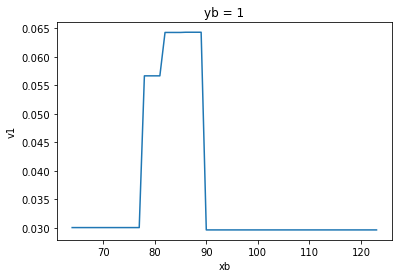

In [31]:
checkit = xr.open_dataset('ncfiles/tides/SalishSea_double_north_tide_K1_grid_V.nc')
checkit.v1.plot();

In [32]:
checkit.close()

<xarray.Dataset>
Dimensions:  (xb: 190, yb: 1)
Coordinates:
  * yb       (yb) int32 1
  * xb       (xb) int32 752 753 754 755 756 757 758 ... 936 937 938 939 940 941
Data variables:
    v1       (yb, xb) float64 ...
    v2       (yb, xb) float64 ...
Attributes:
    acknowledgements:      from Webtide + tuning
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    summary:               Tides file, doubled by copying from north: N36_AF,...
    source:                tools/double_resolution/tides.ipynb
    history:               [2022-06-23] File creation.


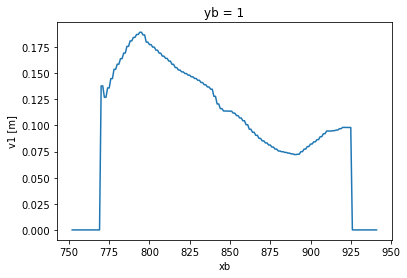

In [35]:
checkit = xr.open_dataset('ncfiles/tides/SalishSea_double_west_tide_K1_grid_V.nc')
checkit.v1.plot();
print (checkit)
checkit.close();

In [ ]:
nc.Dataset('../../tides/north/SalishSea_N36_AF_North_tide_M2_grid_T.nc')

In [ ]:
nc.Dataset('../../tides/west/SalishSea_N36_AF_west_tide_M2_grid_T.nc')